# Aim:

The aim of this notebook is to understand how to plot a decision boundry for use in demonstrating the effectiveness of my learning models in a 2D environment.

This is based off the implementation used by Andrew Ng in his Deeplearning.ai course on Coursera. 

After seeing the implementation I did not understand it right away but value it as a tool to explain the decision boundry to people not familiar with the concept. I thus decided to work through it in a seperate notebook and so here we are.

## Load and explore the dataset to be used for visualisation

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [135]:
def load_dataset():
    """
    Loads and plots the make_circles dataset from sklearn.datasets
    """
    # Circle 1
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    # Circle 2
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

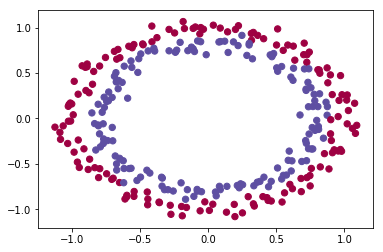

In [136]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [137]:
print(f"train_X.shape: {train_X.shape}")
print(f"train_Y.shape: {train_Y.shape}")
print(f"test_X.shape: {test_X.shape}")
print(f"test_Y.shape: {test_Y.shape}")

train_X.shape: (2, 300)
train_Y.shape: (1, 300)
test_X.shape: (2, 100)
test_Y.shape: (1, 100)


Thus we can see that train_X is a two dimensional matrix with two attributes for each observation. These two attributes are used to correspond to the x and y axis positions on the plot above. We can also see that the points are classified into their different colors using y and that y is binary (either red or blue).

Initially the sklearn dataset was organised the train set so that each row corresponded to an observation but in order to work with Andrew ng's implementation of the plot_decision_boundry function I had to transpose the martices and so now each column corresponds to a different observation and each row corresponds to a different attribute

In [138]:
# Here are the first few observations in train_X in pandas DataFrame form for ease of understanding
import pandas as pd

df_x = pd.DataFrame(train_X[:,:13])

df_x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.077414,0.431870,0.079165,-0.630921,-0.273100,0.560410,0.300409,-1.026194,0.409155,-0.578937,0.088840,1.080495,0.796212
1,0.852602,-0.872145,0.840661,0.396287,-1.055061,-0.819041,0.807947,0.133089,-0.646621,-0.551993,-0.784379,-0.164722,-0.021579


In [139]:
# And here are the corresponding classifications
df_y = pd.DataFrame(train_Y[:,:13])

df_y

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,1,1,0,0,1,0,1,1,1,0,1


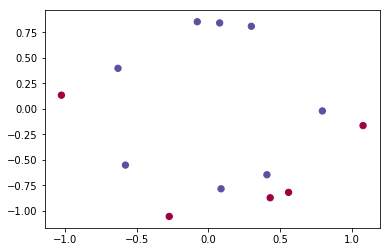

In [140]:
# Let's plot these points 
ax = plt.axes()

ax.scatter(train_X[0,:13], train_X[1,:13], c=train_Y[0,:13], s=40, cmap=plt.cm.Spectral)

# Save dimensions for next plot
xlim = ax.get_xlim()
ylim = ax.get_ylim()

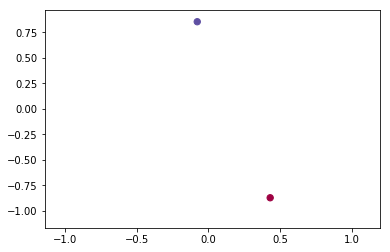

In [141]:
# Lets have a look at the first two observations in train_X with different y values  
ax = plt.axes()
ax.set_xlim(xlim) 
ax.set_ylim(ylim) 

ax.scatter(train_X[0,:2], train_X[1,:2], c=train_Y[0,:2], s=40, cmap=plt.cm.Spectral)


Now that we have a good understanding of the dataset, let's look at the plot_decision_boundry function

## Andrew Ng's implementation

In [142]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()

### Analyse the function:

**Parameters:**

- model: The neural network model
- X: The inputs 
- y: The actual target values

**Set min and max values and give it some padding:**

x_min is equal to the lowest value in first row of matrix x less 1. This means that x_min is equal to the lowest value for attribute 1 less 1 to give some padding.

Consequently y_min is equal to the lowest value for attribute 2 less 1, x_max is equal to the highest value for attribute 1 plus 1 and y_max is equal the highest value for attribute 2 plus 1.

The purpose of lines 3 and 4 is thus to determine the boundry of the plot.

Line 5 sets h equal to 0.01 and is used by line 7 to create the grid on which to plot the points.

**Generate a grid of points with distance h between them:**

Accourding to [this link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) np.meshgrid takes the following parameter:

- x1, x2,…, xn : array_like
  1-D arrays representing the coordinates of a grid.

and returns:

- X1, X2,…, XN : ndarray
  For vectors x1, x2,…, ‘xn’ with lengths Ni=len(xi) , return (N1, N2, N3,...Nn) shaped arrays if indexing=’ij’     or (N2, N1, N3,...Nn) shaped arrays if indexing=’xy’ with the elements of xi repeated to fill the matrix along   the first dimension for x1, the second for x2 and so on.

Thus the function takes in the dimensions of the grid including the x_range, y_range and space between coordinate points and return two matrices with the first representing the x coordinates and the second representing the y coordinates.

**Predict the function value for the whole grid:**

Z is equal to the matrix returned when the predict function is called on all points in the meshgrid and thus represents the predictions for every coordinate point in the grid.
Z is then reshaped to match the shape of the x coordinates as this is necessary to call the contourf function.

**Plot the contour and training examples:**

The [plt.coutourf function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) is called using the following parameters:


- X, Y : array-like, optional
  The coordinates of the values in Z.

  X and Y must both be 2-D with the same shape as Z (e.g. created via numpy.meshgrid()), or they must both be 1-D   such that len(X) == M is the number of columns in Z and len(Y) == N is the number of rows in Z.

  If not given, they are assumed to be integer indices, i.e. X = range(M), Y = range(N).


- Z : array-like(N, M)
  The height values over which the contour is drawn.

The remaining lines then plot the points on the plot, lebel the axes, etc.

### Experimenting

Now that we understand how everything works, let's draw some contours!

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


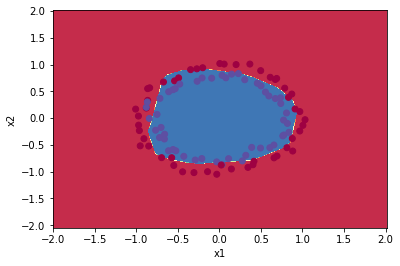

In [143]:
# Develop and fit the model

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,10,10))

# Make sure matrices are the correct shapes
if train_X.shape == (2,300):
    train_X = train_X.T
    train_Y = train_Y.T
    
model.fit(train_X, train_Y)

# Alter the function to accept the sklearn model
def plot_decision_boundary_modified(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid using model.predict
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()

plot_decision_boundary_modified(model, test_X, test_Y)

# Success!